In [ ]:
#TASK-01 :
#Implementation of Graph search algorithms (Breadth first search and Depth First Search) using following constraints.

#BFS: Pick any node, visit the adjacent unvisited vertex, mark it as visited, display it, and insert it in a queue. If there are no remaining adjacent vertices left, remove the first vertex from the queue. Apply recursion concept to follow the above steps until the queue is empty or the desired node is found

#AIM:
#To implement Breadth-First Search to determine the shortest path between two intersections in a city's road network.

#Program:
from collections import deque
def bfs_shortest_path(graph, start, goal):
    visited = set()
    queue = deque([[start]])
    if start == goal:
        return [start]
    while queue:
        path = queue.popleft()
        node = path[-1]
        if node not in visited:
            for neighbor in graph[node]:
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)
                if neighbor == goal:
                    return new_path
            visited.add(node)
    return None
# Example graph representing intersections and roads
city_graph = {
'A': ['B', 'C'],
'B': ['A', 'D', 'E'],
'C': ['A', 'F'],
'D': ['B'],
'E': ['B', 'F'],
'F': ['C', 'E']
}
# Test
start = 'A'
goal = 'F'
shortest_path = bfs_shortest_path(city_graph, start, goal)
print("Shortest path from", start, "to", goal, "is:", shortest_path)

Shortest path from A to F is: ['A', 'C', 'F']


In [ ]:
#DFS: Pick any node. If it is unvisited, mark it as visited and recur on all its adjacent nodes. Repeat until all the nodes are visited, or the node to be searched is found.

#AIM:
#To implement Depth-First Search to explore a 2D forest grid and find a fire hotspot from a base station.

#Program:
graph = {
'A': ['B', 'C'],
'B': ['D', 'E'],
'C': ['F'],
'D': [],
'E': ['G'],
'F': [],
'G': []
}
visited_dfs = set()
stack = []

def dfs_stack_recursive():
    if not stack:
        return
    current = stack[-1]

    unvisited_found = False
    for neighbor in graph.get(current, []): # Use .get() for safer access
        if neighbor not in visited_dfs:
            visited_dfs.add(neighbor)
            print(neighbor, end=' ')
            stack.append(neighbor)
            unvisited_found = True
            break

    if not unvisited_found:
        stack.pop()

    dfs_stack_recursive()

start_node_dfs = 'A'
visited_dfs.add(start_node_dfs)
stack.append(start_node_dfs)
print("\nDFS Traversal Output:")
print(start_node_dfs, end=' ')
dfs_stack_recursive()

# The following code implements DFS for a 2D grid, which seems separate from the graph traversal above.
# It also had syntax errors and appears incomplete based on the original prompt.
# I will comment this out and suggest a clearer approach for the 2D forest grid task.

def dfs_forest(grid, x, y, visited, path):
    rows, cols = len(grid), len(grid[0])
    # Boundary and obstacle check
    if x < 0 or y < 0 or x >= rows or y >= cols or grid[x][y] == 'X' or visited[x][y]:
        return False

    path.append((x, y))
    visited[x][y] = True

    if grid[x][y] == 'H':
        return True

    # Move in 4 directions
    for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
        if dfs_forest(grid, x+dx, y+dy, visited, path):
            return True

    path.pop()
    return False

# Forest grid
forest = [
    ['S', 'O', 'X', 'O'],
    ['X', 'O', 'X', 'O'],
    ['O', 'O', 'O', 'H'],
    ['X', 'X', 'O', 'X']
]

rows, cols = len(forest), len(forest[0])
visited = [[False for _ in range(cols)] for _ in range(rows)]
path = []

# Find start point
start_x, start_y = -1, -1
for i in range(rows):
    for j in range(cols):
        if forest[i][j] == 'S':
            start_x, start_y = i, j
            break
    if start_x != -1:
        break

if start_x != -1:
    found = dfs_forest(forest, start_x, start_y, visited, path)
    if found:
        print("\nPath to hotspot:", path)
    else:
        print("\nNo hotspot found.")
else:
    print("\nStart point 'S' not found in the forest grid.")


DFS Traversal Output:
A B D E G C F 
Path to hotspot: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3)]


In [ ]:
#TASK-02 :
#Implementation of the Hill-climbing algorithm for the Heuristic search approach using the following constraints.
#i.     Create a function generating all neighbours of a solution
#ii.    Create a function calculating the length of a route.
#iii.   Create a random solution generator.
#iv.    Create a Travelling salesman problem.

#AIM:
#To implement a hill-climbing heuristic search algorithm for an autonomous robot navigating a grid-based warehouse layout. The robot will move from a starting point to the goal while minimizing distance using Manhattan Distance as the heuristic function.

#PROGRAM:
import heapq

def astar_search(grid, start, goal):
    rows, cols = len(grid), len(grid[0])
    # Define possible movements (up, down, left, right)
    moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    # Function to check if a position is valid
    def is_valid(pos):
        x, y = pos
        return 0 <= x < rows and 0 <= y < cols and grid[x][y] != 'X'

    # Manhattan distance heuristic
    def heuristic(pos, goal):
        return abs(pos[0] - goal[0]) + abs(pos[1] - goal[1])

    # Initialize the open list (priority queue) and closed set
    # The priority queue stores tuples: (f_cost, g_cost, position, path)
    open_list = [(heuristic(start, goal), 0, start, [start])]
    heapq.heapify(open_list)
    closed_set = set()

    while open_list:
        # Get the node with the lowest f_cost from the open list
        f_cost, g_cost, current_pos, path = heapq.heappop(open_list)

        # If we reached the goal, return the path
        if current_pos == goal:
            return path

        # Add the current node to the closed set
        closed_set.add(current_pos)

        # Explore neighbors
        x, y = current_pos
        for dx, dy in moves:
            neighbor_pos = (x + dx, y + dy)

            # Check if the neighbor is valid and not in the closed set
            if is_valid(neighbor_pos) and neighbor_pos not in closed_set:
                new_g_cost = g_cost + 1  # Assuming uniform cost for each move
                new_path = path + [neighbor_pos]
                new_f_cost = new_g_cost + heuristic(neighbor_pos, goal)

                # Check if the neighbor is already in the open list with a higher g_cost
                # If so, update it with the new, lower g_cost and path
                in_open_list = False
                for i, (f, g, pos, p) in enumerate(open_list):
                    if pos == neighbor_pos:
                        in_open_list = True
                        if new_g_cost < g:
                            open_list[i] = (new_f_cost, new_g_cost, neighbor_pos, new_path)
                            heapq._siftdown(open_list, 0, i) # Re-heapify the item
                        break

                # If the neighbor is not in the open list, add it
                if not in_open_list:
                    heapq.heappush(open_list, (new_f_cost, new_g_cost, neighbor_pos, new_path))

    # If the goal is not reachable
    return None

# Warehouse grid (same as before)
warehouse = [
    ['S', 'O', 'O', 'X', 'O', 'O'],
    ['X', 'X', 'O', 'X', 'O', 'X'],
    ['O', 'O', 'O', 'O', 'O', 'O'],
    ['O', 'X', 'X', 'X', 'X', 'O'],
    ['O', 'O', 'O', 'O', 'G', 'O']
]

# Find start and goal positions
def find_position(grid, char):
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == char:
                return (i, j)
    return None

start = find_position(warehouse, 'S')
goal = find_position(warehouse, 'G')

# Run A* search
if start and goal:
    path = astar_search(warehouse, start, goal)
    if path:
        print("Path found by A* search:", path)
    else:
        print("No path found by A* search.")
else:
    print("Start or goal not found in the warehouse grid.")

Path found by A* search: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (2, 5), (3, 5), (4, 5), (4, 4)]


In [ ]:
#TASK:03
#Implementation of A * Algorithm to find the optimal path using Python by following constraints.
#The goal of the A* algorithm is to find the shortest path from the starting point to the goal point as fast as possible.
#The full path cost (f) for each node is calculated as the distance to the starting node (g) plus the distance to the goal node (h).
#Distances are calculated as the Manhattan distance (taxicab geometry) between nodes.

#AIM:
#To implement the A* (A-Star) search algorithm in Python for computing the optimal evacuation path from an emergency site to a relief centre in a flood-affected city, using Manhattan distance as the heuristic function

#PROGRAM:
import heapq

def manhattan_distance(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star_search(start, goal, graph):
    open_list = []
    heapq.heappush(open_list, (0, start)) # (f, node)

    came_from = {}
    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0

    f_score = {node: float('inf') for node in graph}
    f_score[start] = manhattan_distance(start, goal)

    while open_list:
        current_f, current = heapq.heappop(open_list)

        if current == goal:
            # reconstruct path
            path = []
            total_cost = g_score[goal]
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path, total_cost

        for neighbor, cost in graph.get(current, []): # Use .get() for safer access
            tentative_g = g_score[current] + cost
            if tentative_g < g_score.get(neighbor, float('inf')): # Use .get() for safer access
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                f_score[neighbor] = tentative_g + manhattan_distance(neighbor, goal)
                heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None, float('inf')

# Sample Input:
graph = {
(0, 0): [((1, 0), 1), ((0, 1), 4)],
(1, 0): [((0, 0), 1), ((1, 1), 2)],
(0, 1): [((0, 0), 4), ((1, 1), 3)],
(1, 1): [((1, 0), 2), ((0, 1), 3), ((2, 1), 1)],
(2, 1): [((1, 1), 1), ((2, 2), 2)],
(2, 2): [((2, 1), 2)]

}
start = (0, 0)
goal = (2, 2)

path, cost = a_star_search(start, goal, graph)
print("Optimal Path:", path)
print("Total Cost:", cost)

Optimal Path: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2)]
Total Cost: 6


In [ ]:
#TASK:04
#Implementation of the Mini-Max algorithm uses recursion to search through the game tree using Python by applying the following constraints.
#In this algorithm, two players play the checker’s game; one is called MAX and the other is called MIN.
#Both players fight it as the opponent player gets the minimum benefit while they get the maximum benefit.
#Both Players of the game are opponents of each other, where MAX will select the maximized value and MIN will select the minimized value.
#The minimax algorithm performs a depth-first search for the exploration of the complete game tree.
#The minimax algorithm proceeds all the way down to the terminal node of the tree, then backtracks the tree as the recursion.

#AIM:
#To implement the Mini-Max algorithm using recursion in Python to design an AI opponent for the game of Tic-Tac-Toe. The algorithm evaluates all possible moves using depth-first search on the game tree, selecting the best move for the AI (MAX player) while assuming the opponent (MIN player) plays optimally.

#PROGRAM:
def print_board(board):
    for row in board:
        print(row)
    print()

def check_winner(board):
    for i in range(3):
        if board[i][0] == board[i][1] == board[i][2] != '_':
            return board[i][0]
        if board[0][i] == board[1][i] == board[2][i] != '_':
            return board[0][i]
    if board[0][0] == board[1][1] == board[2][2] != '_':
        return board[0][0]
    if board[0][2] == board[1][1] == board[2][0] != '_':
        return board[0][2]
    return None

def is_full(board):
    return all(cell != '_' for row in board for cell in row)

def minimax(board, is_maximizing):
    winner = check_winner(board)
    if winner == 'X':
        return 1
    elif winner == 'O':
        return -1
    elif is_full(board):
        return 0

    if is_maximizing:
        best_score = -float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == '_':
                    board[i][j] = 'X'
                    score = minimax(board, False)
                    board[i][j] = '_'
                    best_score = max(score, best_score)
        return best_score
    else:
        best_score = float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == '_':
                    board[i][j] = 'O'
                    score = minimax(board, True)
                    board[i][j] = '_'
                    best_score = min(score, best_score)
        return best_score

def best_move(board):
    best_score = -float('inf')
    move = None
    for i in range(3):
        for j in range(3):
            if board[i][j] == '_':
                board[i][j] = 'X'
                score = minimax(board, False)
                board[i][j] = '_'
                if score > best_score:
                    best_score = score
                    move = (i, j)
    return move

board = [
    ['X', 'O', 'X'],
    ['_', 'O', '_'],
    ['_', '_', '_']
]

print("Current Board:")
print_board(board)

move = best_move(board)
print(f"AI recommends move at position: {move}")

Current Board:
['X', 'O', 'X']
['_', 'O', '_']
['_', '_', '_']

AI recommends move at position: (2, 1)


In [ ]:
#TASK:05
#Implementation of Ant Colony Optimization to Optimize Ride-Sharing Trip Duration using Python by following constraints.
#To forecast travel times between every pair of pick-up and drop-off locations.
#To find the shortest route that visits a set of locations.
#To implement optimization techniques is required to intelligently search the solution space and find near-optimal solutions.

#AIM:
#To implement the Ant Colony Optimization (ACO) algorithm in Python to find the shortest delivery route that minimizes trip duration in a ride-sharing or food delivery scenario

#PROGRAM:
import random
import numpy as np

distance_matrix = [
    [0, 2, 2, 5, 7],
    [2, 0, 4, 8, 2],
    [2, 4, 0, 1, 3],
    [5, 8, 1, 0, 2],
    [7, 2, 3, 2, 0]
]

num_ants = 5
num_cities = len(distance_matrix)
num_iterations = 100
evaporation_rate = 0.5
alpha = 1
beta = 2

pheromone = [[1 for _ in range(num_cities)] for _ in range(num_cities)]

def calculate_probability(from_city, to_city, visited):
    if to_city in visited:
        return 0
    pher = pheromone[from_city][to_city] ** alpha
    heuristic = (1 / distance_matrix[from_city][to_city]) ** beta
    return pher * heuristic

def select_next_city(current_city, visited):
    probabilities = [calculate_probability(current_city, i, visited) for i in range(num_cities)]
    total = sum(probabilities)
    if total == 0:
        return random.choice([i for i in range(num_cities) if i not in visited])
    probabilities = [p / total for p in probabilities]
    return int(np.random.choice(range(num_cities), p=probabilities))

def build_solution():
    solutions = []
    for _ in range(num_ants):
        visited = []
        current_city = 1  # FIX: start from city 1 every time
        visited.append(current_city)
        while len(visited) < num_cities:
            next_city = select_next_city(current_city, visited)
            visited.append(next_city)
            current_city = next_city
        solutions.append(visited)
    return solutions

def route_distance(route):
    return sum(distance_matrix[route[i]][route[i + 1]] for i in range(len(route) - 1)) + distance_matrix[route[-1]][route[0]]

def update_pheromones(solutions):
    global pheromone
    for i in range(num_cities):
        for j in range(num_cities):
            pheromone[i][j] *= (1 - evaporation_rate)
    for route in solutions:
        dist = route_distance(route)
        for i in range(num_cities):
            from_city = route[i]
            to_city = route[(i + 1) % num_cities]
            pheromone[from_city][to_city] += 1.0 / dist

best_route = None
best_distance = float('inf')

for _ in range(num_iterations):
    solutions = build_solution()
    update_pheromones(solutions)
    for route in solutions:
        dist = route_distance(route)
        if dist < best_distance:
            best_distance = dist
            best_route = route

print("Best route found:", best_route)
print("Total trip duration:", best_distance)

Best route found: [1, 0, 2, 3, 4]
Total trip duration: 9


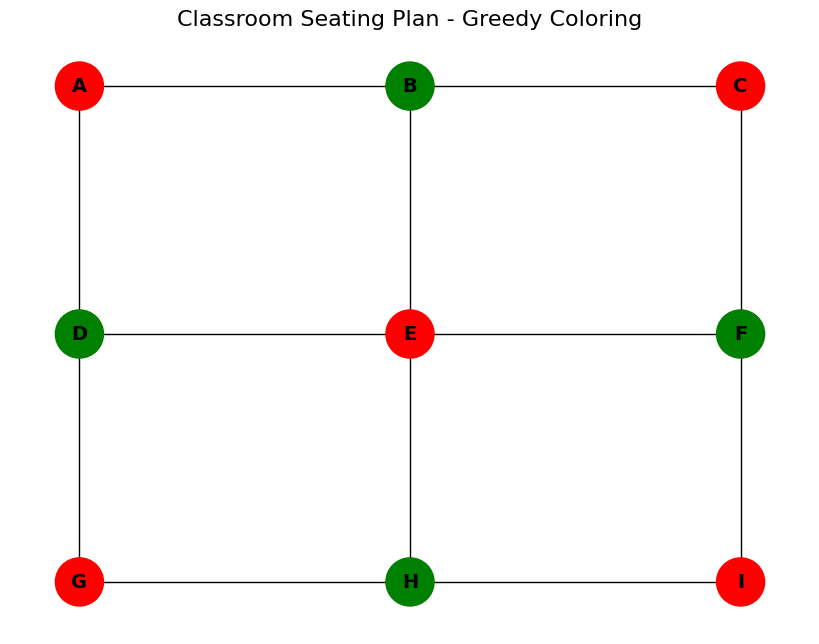

Seat : Assigned Color
A : red
B : green
C : red
D : green
E : red
F : green
G : red
H : green
I : red


In [ ]:
#TASK:06
#Solve a Map Coloring problem using a constraint satisfaction approach by applying the following constraints
#Assign each territory a color such that no two adjacent territories have the same color by considering the following parameters: Domains, Variables, and Constraints
#Apply Basic Greedy Coloring Algorithm: Color the first vertex with the first color, and do the following for the remaining V-1 vertices.
#Consider the currently picked vertex and color it with the lowest numbered color that has not been used on any previously colored vertices adjacent to it. If all previously used colors appear on vertices adjacent to v, assign a new color to it.

#AIM:
#To assign color tags to students in a classroom such that no two students sitting adjacent (left, right, front, or back) to each other wear the same color tag, using a constraint satisfaction approach and the Greedy Coloring Algorithm

#PROGRAM:
import networkx as nx
import matplotlib.pyplot as plt

# Define the graph (Classroom seating as adjacency list)
graph = {
'A': ['B', 'D'],
'B': ['A', 'C', 'E'],
'C': ['B', 'F'],
'D': ['A', 'E', 'G'],
'E': ['B', 'D', 'F', 'H'],
'F': ['C', 'E', 'I'],
'G': ['D', 'H'],
'H': ['E', 'G', 'I'],
'I': ['F', 'H']
}

# Available color palette (extendable if needed)
color_palette = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'cyan', 'brown']

# Greedy coloring algorithm
def greedy_coloring(graph):
    color_assignment = {}
    for node in graph:
        # Collect used colors from adjacent nodes
        used_colors = {color_assignment.get(neigh) for neigh in graph[node] if neigh in color_assignment}
        # Assign the lowest unused color
        for color in color_palette:
            if color not in used_colors:
                color_assignment[node] = color
                break
    return color_assignment

# Apply the greedy coloring
coloring_result = greedy_coloring(graph)

# Create a graph using NetworkX
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Prepare node colors from coloring result
node_colors = [coloring_result[node] for node in G.nodes()]

# Set positions manually to mimic a 3x3 classroom seating grid
positions = {
    'A': (0, 2),
    'B': (1, 2),
    'C': (2, 2),
    'D': (0, 1),
    'E': (1, 1),
    'F': (2, 1),
    'G': (0, 0),
    'H': (1, 0),
    'I': (2, 0)
}

# Plotting the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos=positions, with_labels=True, node_color=node_colors, node_size=1200, font_size=14, font_weight='bold')
plt.title("Classroom Seating Plan - Greedy Coloring", fontsize=16)
plt.axis('off')
plt.show()

# Print the color assignment
print("Seat : Assigned Color")
for seat, color in coloring_result.items():
    print(f"{seat} : {color}")

In [ ]:
#TASK:07-A
#Implementation of Monkey Banana Problem in Goal Stack planning using Python by applying the following constraints.
#Imagine a room containing a monkey, a chair, and some bananas. That has been hung from the centre of the ceiling. If the monkey is clever enough, he can reach the bananas by placing the chair directly below the bananas and climbing on the chair. The problem is to prove the monkey can reach the bananas. The monkey wants it, but cannot jump high enough from the floor. At the window of the room, there is a box that the monkey can use. The monkey can perform the Following actions: -
#1)	Walk on the floor.
#2)	Climb the box.
#3)	Push the box around (if it is beside the box).
#4)	Grasp the banana if it is standing on the box directly under the banana.

#AIM:
#To implement a solution to the Monkey-Banana problem using goal stack planning in Python, demonstrating how an intelligent agent (monkey) achieves a goal by planning a sequence of actions such as walking, pushing a box, climbing it, and grasping bananas.

#PROGRAM:
# task7
state = {
 'monkey_location': 'door',
 'box_location': 'window',
 'monkey_on_box': False,
 'monkey_has_banana': False
}
goal_stack = ['has(monkey, banana)']
actions = []
def walk(x, y):
 state['monkey_location'] = y
 actions.append(f"Walk from {x} to {y}")
def push(x, y):
 state['monkey_location'] = y
 state['box_location'] = y
 actions.append(f"Push box from {x} to {y}")
def climb_up():
 state['monkey_on_box'] = True
 actions.append("Climb up the box")
def grasp():
 state['monkey_has_banana'] = True
 actions.append("Grasp the banana")
while goal_stack:
 goal = goal_stack.pop()
 if goal == 'has(monkey, banana)':
  if not state['monkey_has_banana']:
   goal_stack.append('perform(grasp)')
   goal_stack.append('at(monkey, middle)')
   goal_stack.append('on(monkey, box)')
 elif goal == 'perform(grasp)':
  if state['monkey_location'] == 'middle' and state['monkey_on_box']:
   grasp()
 elif goal == 'on(monkey, box)':
  if not state['monkey_on_box']:
   if state['monkey_location'] == state['box_location']:
    goal_stack.append('perform(climb_up)')
   else:
    goal_stack.append(f'at(monkey, {state["box_location"]})')
 elif goal == 'perform(climb_up)':
  climb_up()
 elif goal.startswith('at(monkey,'):
  target = goal.split(',')[1].strip(' )')
  if state['monkey_location'] != target:
   if state['monkey_location'] == state['box_location']:
    push(state['box_location'], target)
   else:
    walk(state['monkey_location'], target)
print("Monkey-Banana Planning Actions:")
for step in actions:
 print("➤", step)
print("\nFinal State:")
for key, value in state.items():
 print(f"{key}: {value}")

Monkey-Banana Planning Actions:
➤ Walk from door to window
➤ Push box from window to middle

Final State:
monkey_location: middle
box_location: middle
monkey_on_box: False
monkey_has_banana: False


In [ ]:
#TASK:07-B
#A playful puppy is trying to get its favorite toy placed on a high shelf in the living room. The puppy cannot jump high enough, but notices a small box nearby that can help. The room is shown as a 2D grid, with the puppy starting in one corner and the toy on a high shelf. The puppy can move (walk) across the floor, push the box to any location (if next to it), climb on top of the box, and grab the toy (if standing on the box directly below the shelf). Using Goal Stack Planning, implement a solution in Python that helps the puppy plan the correct sequence of steps, navigate around any obstacles, and use the box smartly to finally reach and grab the toy

#AIM:
#To implement a Goal Stack Planning approach using Python to help a puppy reach its toy placed on a high shelf using a movable box, while satisfying constraints of walking, pushing the box, climbing it, and grabbing the toy when directly below the shelf.

#PROGRAM:

# Grid coordinates: (x, y)
toy_position = (2, 2) # Toy is placed at center ceiling
box_position = [0, 0] # Initial box position
puppy_position = [0, 1] # Puppy starts in corner
on_box = False
has_toy = False # Initialize has_toy
# Action log
actions = []
# Define room size (optional for visualization)
room_size = 3 # 3x3 grid
# Define helper functions
def walk(to):
    global puppy_position
    actions.append(f"Walk from {tuple(puppy_position)} to {to}")
    puppy_position[0], puppy_position[1] = to

def push_box(to):
    global puppy_position, box_position
    actions.append(f"Push box from {tuple(box_position)} to {to}")
    box_position[0], box_position[1] = to
    puppy_position[0], puppy_position[1] = to # Puppy moves with box

def climb_box():
    global on_box
    actions.append("Climb on box")
    on_box = True

def grab_toy():
    global has_toy
    actions.append("Grab the toy")
    has_toy = True

# Goal Stack Planning
def goal_stack_planning():
    stack = ['HasToy']
    while stack:
        goal = stack.pop()
        if goal == 'HasToy':
            if has_toy:
                continue
            # Preconditions for grabbing toy
            if puppy_position == list(toy_position) and box_position == list(toy_position) and on_box: # Corrected condition
                grab_toy()
            else:
                stack.append('HasToy') # Retry after subgoals
                stack.append('OnBox')
                stack.append(('MoveBoxUnderToy', toy_position))
        elif goal == 'OnBox':
            if on_box:
                continue
            if puppy_position == box_position:
                climb_box()
            else:
                stack.append('OnBox')
                stack.append(('WalkTo', tuple(box_position)))
        elif isinstance(goal, tuple) and goal[0] == 'MoveBoxUnderToy':
            if box_position == list(goal[1]):
                continue
            stack.append(('MoveBoxUnderToy', goal[1]))
            stack.append(('WalkTo', tuple(box_position)))
            stack.append(('PushBoxTo', goal[1]))
        elif isinstance(goal, tuple) and goal[0] == 'WalkTo':
            if puppy_position == list(goal[1]):
                continue
            walk(goal[1])
        elif isinstance(goal, tuple) and goal[0] == 'PushBoxTo':
            if box_position == list(goal[1]):
                continue
            push_box(goal[1])

# Run the planner
goal_stack_planning()

# Display the steps
print("\nPlan to achieve goal:")
for step in actions:
    print("→", step)

# Final state
print("\nFinal State:")
print("Puppy Position:", tuple(puppy_position))
print("Box Position:", tuple(box_position))
print("On Box:", on_box)
print("Has Toy:", has_toy)


Plan to achieve goal:
→ Push box from (0, 0) to (2, 2)
→ Walk from (2, 2) to (0, 0)
→ Walk from (0, 0) to (2, 2)
→ Climb on box
→ Grab the toy

Final State:
Puppy Position: (2, 2)
Box Position: (2, 2)
On Box: True
Has Toy: True


In [ ]:
#TASK:08
#Implementation of the N-queen problem using the backtracking algorithm using Python
#In the 4 Queens problem, the object is to place 4 queens on a chessboard in such a way that no queens can capture a piece. This means that no two queens may be placed on the same row, column, or diagonal.

#AIM:
#To implement the 4-Queens Problem using the backtracking algorithm in Python by placing 4 security guards in a museum (4x4 grid) such that no two guards are able to monitor each other (i.e., no two guards are in the same row, column, or diagonal).

#PROGRAM:
#TASK 8
N = 4 # Size of the grid

# Function to print the board
def print_board(board):
    for row in board:
        print(" ".join('G' if col else '.' for col in row))
    print()

# Check if it's safe to place a guard at board[row][col]
def is_safe(board, row, col):
    # Check vertical up
    for i in range(row):
        if board[i][col] == 1:
            return False

    # Check upper left diagonal
    i, j = row - 1, col - 1
    while i >= 0 and j >= 0:
        if board[i][j] == 1:
            return False
        i -= 1
        j -= 1

    # Check upper right diagonal
    i, j = row - 1, col + 1
    while i >= 0 and j < N:
        if board[i][j] == 1:
            return False
        i -= 1
        j += 1

    return True

# Backtracking function
def solve_n_queens(board, row):
    if row == N:
        print_board(board)
        return True

    res = False
    for col in range(N):
        if is_safe(board, row, col):
            board[row][col] = 1
            res = solve_n_queens(board, row + 1) or res
            board[row][col] = 0 # Backtrack

    return res

# Initialize the board
board = [[0 for _ in range(N)] for _ in range(N)]
print("Valid configurations for placing 4 guards:\n")
solve_n_queens(board, 0)

Valid configurations for placing 4 guards:

. G . .
. . . G
G . . .
. . G .

. . G .
G . . .
. . . G
. G . .



True

In [ ]:
#TASK:09
#To build an Intelligent Chatbot system with Python and DialogFlow using the Interactive Text Mining Framework for the Exploration of Semantic Flows in a Large Corpus of Text.

#AIM:
#To build an intelligent chatbot system with Python and DialogFlow using an interactive text mining framework for exploration of semantic flow in a large corpus of Text

#PROGRAM:
!pip install openai==0.28 gradio
# Install gradio if not already installed
!pip install gradio

import gradio as gr

# Offline intelligent chatbot (no OpenAI key needed)
messages = [{"role": "system", "content": "You are Nila’s Intelligent Chatbot for the Digital Waste Management System."}]

def CustomChatGPT(user_input):
    user_input = user_input.lower()
    reply = ""

    # Simple rule-based replies
    if "hello" in user_input or "hi" in user_input:
        reply = "Hi there 👋! I’m Nila’s Intelligent Chatbot Assistant for Digital Waste Management."
    elif "waste" in user_input:
        reply = "♻️ Always segregate biodegradable and non-biodegradable waste properly to keep the environment clean!"
    elif "recycle" in user_input or "reuse" in user_input:
        reply = "🪄 Great thought! Try reusing plastic bottles as plant pots 🌱 and recycling paper whenever possible."
    elif "compost" in user_input:
        reply = "🍃 Composting food waste is an excellent way to reduce landfill use and create natural fertilizer."
    elif "bye" in user_input or "thank" in user_input:
        reply = "Goodbye 🌸! Keep your surroundings clean and green!"
    else:
        reply = "I’m still learning 🤖 — try asking about recycling, composting, or waste segregation."

    messages.append({"role": "user", "content": user_input})
    messages.append({"role": "assistant", "content": reply})
    return reply

# Create Gradio Interface
demo = gr.Interface(
    fn=CustomChatGPT,
    inputs="text",
    outputs="text",
    title="💬 INTELLIGENT CHATBOT SYSTEM (Offline Demo)",
    description="A simple rule-based chatbot for the Digital Waste Management System — built with Python and Gradio."
)

# Launch the chatbot web app
demo.launch(share=True)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.109.1
    Uninstalling openai-1.109.1:
      Successfully uninstalled openai-1.109.1
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://44823ba698eba18ccc.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
#TASK:10
#Implement simple fact for following:
#a.	Ram likes mango.
#b.	Seema is a girl.
#c.	Bill likes Cindy.
#d.	Rose is red.
#e.	John owns gold.

#AIM:
#To implement a simple fact-based knowledge representation system using logic-based programming in Python by storing and querying basic real-world facts like who likes what, who owns what, and identifying object attributes.

#PROGRAM:
# Simple Knowledge Base using dictionaries
# Knowledge Base: Each key is a predicate with subject-object pairs
knowledge_base = {
 'likes': {
 'Ram': 'Mango',
 'Bill': 'Cindy'
 },
 'is_a': {
 'Seema': 'Girl'
 },
 'color': {
 'Rose': 'Red'
 },
 'owns': {
'John': 'Gold'
 }
}
# Query 1: Is Seema a girl?
def is_seema_a_girl():
 return knowledge_base['is_a'].get('Seema') == 'Girl'
# Query 2: Does Bill like someone?
def who_does_bill_like():
 return knowledge_base['likes'].get('Bill', None)
# Query 3: What color is Rose?
def color_of_rose():
 return knowledge_base['color'].get('Rose', None)
# Run the queries
print("Query: Is Seema a girl?")
print("Answer:", "Yes" if is_seema_a_girl() else "No")
print("\nQuery: Does Bill like someone?")
bill_likes = who_does_bill_like()
print("Answer:", f"Yes, Bill likes {bill_likes}" if bill_likes else "No")
print("\nQuery: What color is Rose?")
rose_color = color_of_rose()
print("Answer:", f"Rose is {rose_color}" if rose_color else "Unknown")

Query: Is Seema a girl?
Answer: Yes

Query: Does Bill like someone?
Answer: Yes, Bill likes Cindy

Query: What color is Rose?
Answer: Rose is Red
